In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest #ranks the features 
from sklearn.feature_selection import chi2,mutual_info_classif
import plotly.express as px

In [2]:
os.getcwd()

'C:\\Users\\appsl\\OneDrive\\Desktop\\Ongoing classes\\Projects\\Practice'

In [3]:
os.chdir(r'C:\Users\appsl\OneDrive\Desktop\Ongoing classes\Projects\Telecom Domain')

### load the dataset

In [4]:
data = pd.read_csv(r'Telecom_Customer_Details.csv')

# exploratory data analysis (EDA)

In [5]:
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [6]:
data['TotalCharges'].isnull().sum()

0

In [7]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
data.shape

(7043, 21)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
data.describe()

SeniorCitizen  tenure  MonthlyCharges
count        7043.00 7043.00         7043.00
mean            0.16   32.37           64.76
std             0.37   24.56           30.09
min             0.00    0.00           18.25
25%             0.00    9.00           35.50
50%             0.00   29.00           70.35
75%             0.00   55.00           89.85
max             1.00   72.00          118.75

<Axes: >

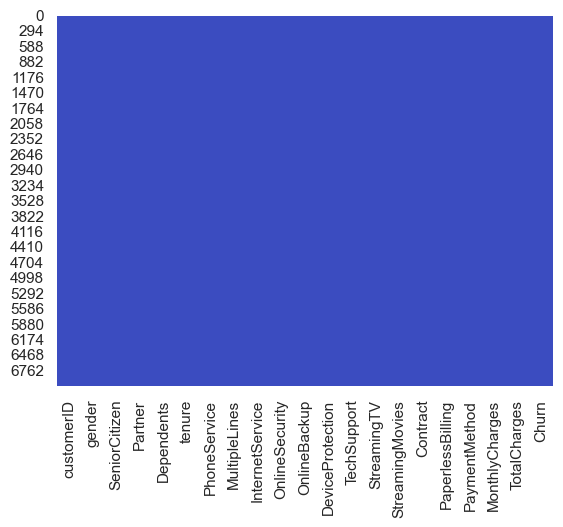

In [11]:
sns.heatmap(data.isnull(),cmap= 'coolwarm',cbar=False)

In [12]:
#Entire DataFrame has no missing values.

In [13]:
print('***************************')
print('rows\t\tmissing values')
print('**************************')
print(data.isnull().sum())
print('**************************')
print(data.isnull().sum().sum())

***************************
rows		missing values
**************************
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
**************************
0


In [14]:
data.isnull().sum().sum()       #no missing data

0

In [15]:
print('********************')
print('Rows\t\tData Type')
print('*******************')
print(data.dtypes)

********************
Rows		Data Type
*******************
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [16]:
#here we can see  that we have lots of items hving data types 'object' ---have to do more EDA 

In [17]:
data.describe().T

count  mean   std   min   25%   50%   75%    max
SeniorCitizen  7043.00  0.16  0.37  0.00  0.00  0.00  0.00   1.00
tenure         7043.00 32.37 24.56  0.00  9.00 29.00 55.00  72.00
MonthlyCharges 7043.00 64.76 30.09 18.25 35.50 70.35 89.85 118.75

In [18]:
#TotalCharges have 'object' dtype , so have to convert that to int

In [19]:
data.TotalCharges.value_counts()     # u can see 11 have blank thats why dtype 'object' 

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [20]:
# Totalcharges have blank value , so we handle it with 'nan'

In [21]:
data ['TotalCharges']=data['TotalCharges'].replace(' ',np.nan)

In [22]:
data['TotalCharges'].isnull().sum()

11

In [23]:
data.TotalCharges.value_counts()

TotalCharges
20.2      11
19.75      9
20.05      8
19.9       8
19.65      8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6530, dtype: int64

In [24]:
#  filters out rows where the TotalCharges column contains missing (NaN) values.

In [25]:
data = data[data['TotalCharges'].notnull()]   #totalcharges-11 null values, delete w. notnull()
data.shape

(7032, 21)

In [26]:
data['TotalCharges'].isnull().sum()

0

In [27]:
data.columns   #drop unwanted - customerid

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [29]:
data['TotalCharges']=data['TotalCharges'].astype(float)  #change 'ob'>'fl' bcoz still its showing 'object'  

In [30]:
data=data.drop('customerID',axis = 1)  #droping customer id (unnecessary col.)

In [31]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [32]:
#Label Encoding: Assigning a unique numerical value to each category in a categorical variable, often used when the order of categories matters.

In [33]:
#
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()           # we are going to build tree based(ensembled model) so use LabelEncoder
                              #IF ur going for linear family model please do 'ONEHOTENCODER' .labelencoder doesn't work.
df1 = data.copy(deep = True)

text_data_features = [i for i in list(data.columns) if i not in list(data.describe().columns)]

print ('Label Encoder Transformation')
for i in text_data_features:
    df1[i] = le.fit_transform(df1[i])
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


In [34]:
data.describe().columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [35]:
df1.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1  
3                 0              0           42.30       1840.75      0  
4                 1              2           70.70        151.65      1

In [36]:
df1.describe().T

count    mean     std   min    25%     50%     75%     max
gender           7032.00    0.50    0.50  0.00   0.00    1.00    1.00    1.00
SeniorCitizen    7032.00    0.16    0.37  0.00   0.00    0.00    0.00    1.00
Partner          7032.00    0.48    0.50  0.00   0.00    0.00    1.00    1.00
Dependents       7032.00    0.30    0.46  0.00   0.00    0.00    1.00    1.00
tenure           7032.00   32.42   24.55  1.00   9.00   29.00   55.00   72.00
PhoneService     7032.00    0.90    0.30  0.00   1.00    1.00    1.00    1.00
MultipleLines    7032.00    0.94    0.95  0.00   0.00    1.00    2.00    2.00
InternetService  7032.00    0.87    0.74  0.00   0.00    1.00    1.00    2.00
OnlineSecurity   7032.00    0.79    0.86  0.00   0.00    1.00    2.00    2.00
OnlineBackup     7032.00    0.91    0.88  0.00   0.00    1.00    2.00    2.00
DeviceProtection 7032.00    0.90    0.88  0.00   0.00    1.00    2.00    2.00
TechSupport      7032.00    0.80    0.86  0.00   0.00    1.00    2.00    2.00
StreamingTV      7032.00    0.98    0.89  0.00   0.00    1.00    2.00    2.00
StreamingMovies  7032.00    0.99    0.89  0.00   0.00    1.00    2.00    2.00
Contract         7032.00    0.69    0.83  0.00   0.00    0.00    1.00    2.00
PaperlessBilling 7032.00    0.59    0.49  0.00   0.00    1.00    1.00    1.00
PaymentMethod    7032.00    1.57    1.07  0.00   1.00    2.00    2.00    3.00
MonthlyCharges   7032.00   64.80   30.09 18.25  35.59   70.35   89.86  118.75
TotalCharges     7032.00 2283.30 2266.77 18.80 401.45 1397.47 3794.74 8684.80
Churn            7032.00    0.27    0.44  0.00   0.00    0.00    1.00    1.00

visualization

In [37]:
churn_distribution = df1['Churn'].value_counts(normalize=True) #dependent variable (imbalanced)
churn_distribution

Churn
0   0.73
1   0.27
Name: proportion, dtype: float64

readme file :This analysis reveals the average characteristics of churned versus non-churned customers, 
highlighting differences in key metrics such as tenure, Monthly Charges,
and Total Charges. By understanding these variations,
businesses can tailor their retention strategies to address the specific needs
and behaviors of at-risk customer segments.

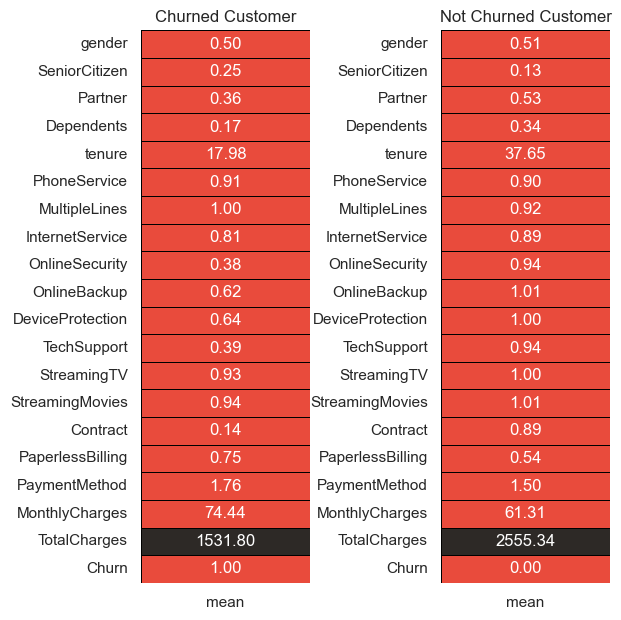

In [38]:
colors = ['#E94B3C','#2D2926']

churn = df1[df1['Churn']==1].describe().T
not_churn = df1[df1['Churn']==0].describe().T

fig,ax = plt.subplots(nrows = 1,ncols=2,figsize =(6,6))
plt.subplot(1,2,1)
          #r#c#visualization
sns.heatmap(churn[['mean']],annot = True,cmap =colors,linewidths=0.4,linecolor = 'black',
           cbar = False,fmt='.2f')
plt.title('Churned Customer')

plt.subplot(1,2,2)
sns.heatmap(not_churn[['mean']],annot = True,cmap =colors,linewidths=0.4,linecolor = 'black',
           cbar = False,fmt='.2f')
plt.title('Not Churned Customer')
fig.tight_layout(pad=0)

# EDA : univariate , bi-variate analysis,multivariate

In [39]:
data.describe()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges
count        7032.00 7032.00         7032.00       7032.00
mean            0.16   32.42           64.80       2283.30
std             0.37   24.55           30.09       2266.77
min             0.00    1.00           18.25         18.80
25%             0.00    9.00           35.59        401.45
50%             0.00   29.00           70.35       1397.47
75%             0.00   55.00           89.86       3794.74
max             1.00   72.00          118.75       8684.80

In [40]:
data['SeniorCitizen'].nunique()   #only this is categorical 

2

In [41]:
data['tenure'].nunique()

72

In [42]:
data['MonthlyCharges'].nunique()

1584

In [43]:
data['TotalCharges'].nunique()

6530

In [44]:
col = list(df1.columns)
categorical_features=[]
numerical_features=[]

for i in col:
    if len(data[i].unique())>6:   #numerical features is >6 like 1,2,53,648,555,4923,0,1458,1446322
        numerical_features.append(i)
    else:
        categorical_features.append(i)
print('categorical_features:',*categorical_features)
print()
print('numerical_features:',*numerical_features)
        


categorical_features: gender SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod Churn

numerical_features: tenure MonthlyCharges TotalCharges


In [45]:
list[df1.columns]

list[Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')]

In [46]:
df1[numerical_features]

tenure  MonthlyCharges  TotalCharges
0          1           29.85         29.85
1         34           56.95       1889.50
2          2           53.85        108.15
3         45           42.30       1840.75
4          2           70.70        151.65
...      ...             ...           ...
7038      24           84.80       1990.50
7039      72          103.20       7362.90
7040      11           29.60        346.45
7041       4           74.40        306.60
7042      66          105.65       6844.50

[7032 rows x 3 columns]

In [47]:
 df1['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32

### Insight

##### As Monthly Charges increase, there is a noticeable rise in the proportion of churned customers, indicating that higher pricing may contribute to customer dissatisfaction and attrition.

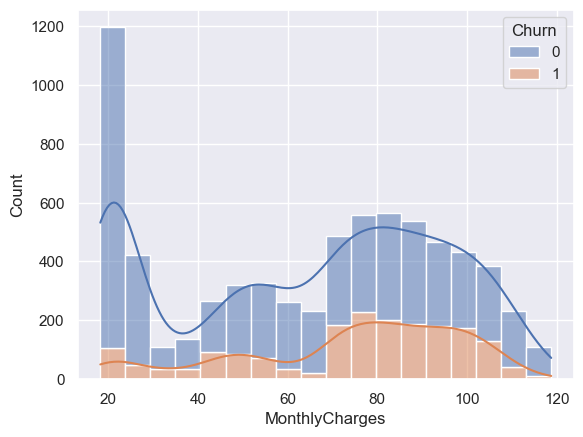

In [48]:
# Using a Histogram, visualize monthly charges and churn
sns.histplot(data=df1, x='MonthlyCharges', hue='Churn', multiple='stack',kde = True)
plt.show()

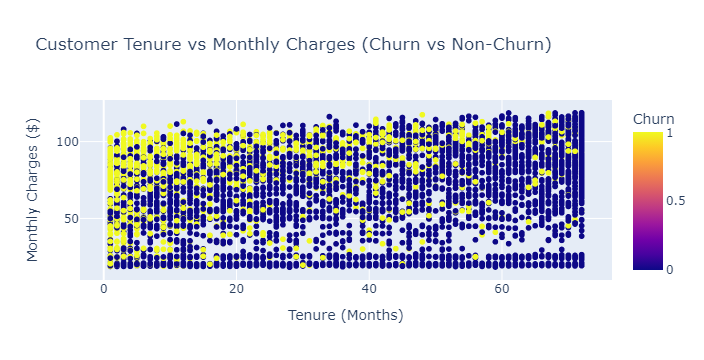

In [49]:
# Create an interactive scatter plot of tenure vs. MonthlyCharges, colored by churn
fig = px.scatter(df1, x='tenure', y='MonthlyCharges', color='Churn', 
                 title='Customer Tenure vs Monthly Charges (Churn vs Non-Churn)',
                 labels={'tenure': 'Tenure (Months)', 'MonthlyCharges': 'Monthly Charges ($)'})

# Show the interactive plot
fig.show()


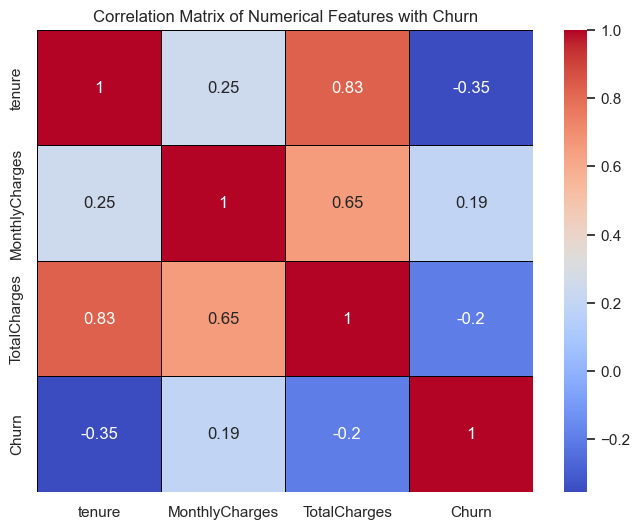

In [50]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df1[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.4, linecolor='black')
plt.title('Correlation Matrix of Numerical Features with Churn')
plt.show()


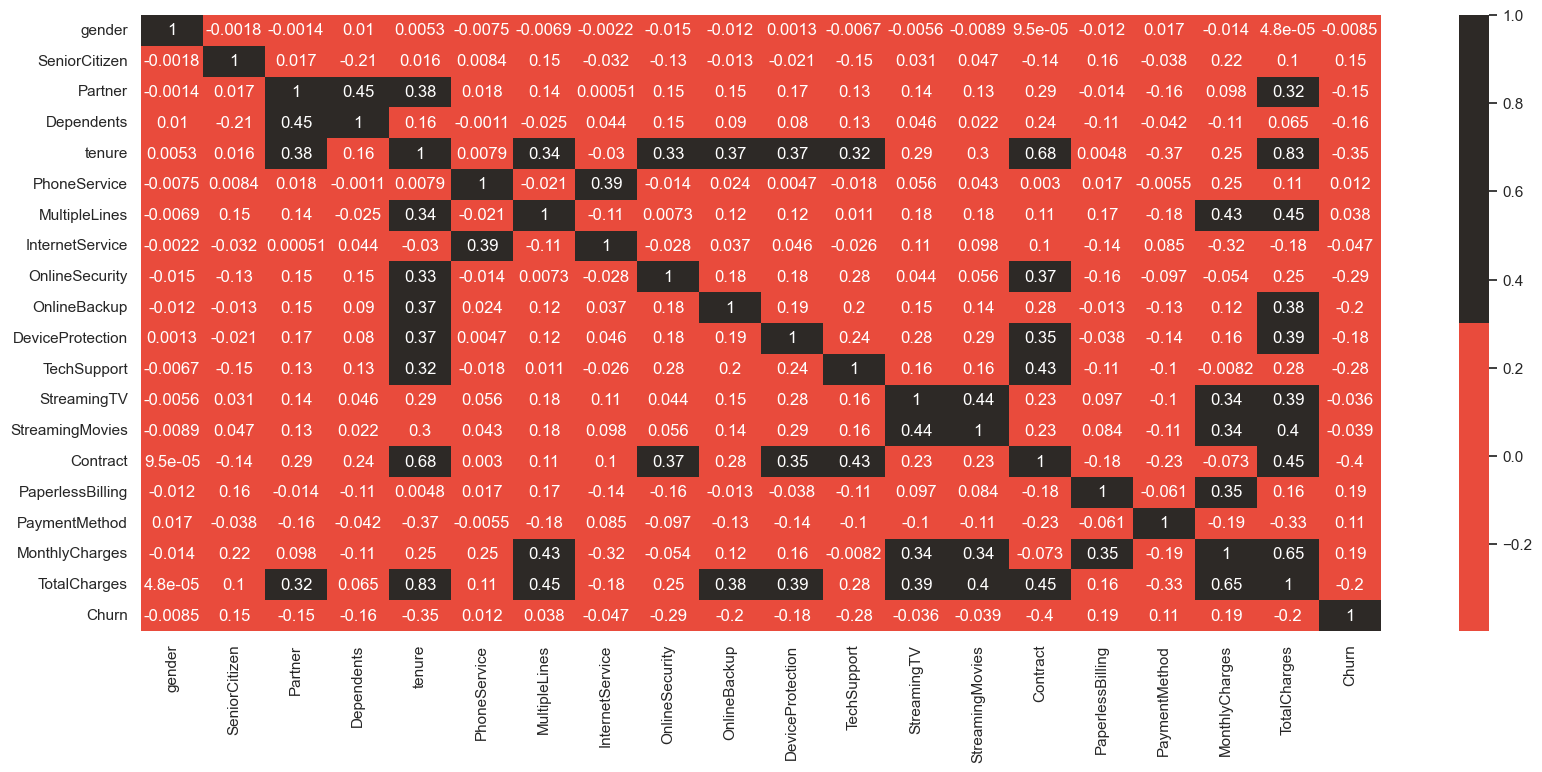

In [51]:
# Correlation part :

plt.figure(figsize=(20,8))
sns.heatmap(df1.corr(), cmap=colors, annot=True);

In [52]:
categorical_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [53]:
df1.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [54]:
categorical_features.remove('Churn')

In [55]:
# Case 1 : Customer information
# Case 2 : Payment information 
# Case 3 : Service Subscribed

In [56]:
categorical_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [57]:
numerical_features

['tenure', 'MonthlyCharges', 'TotalCharges']

In [58]:
l1 = ['gender','SeniorCitizen','Partner','Dependents']
l2 = ['Contract',  'PaperlessBilling',  'PaymentMethod']
l3 = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
      'OnlineBackup',  'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies']

In [59]:
l1 #customer info.

['gender', 'SeniorCitizen', 'Partner', 'Dependents']

In [60]:
data.head(1)

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   

  PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges Churn  
0              Yes  Electronic check           29.85         29.85    No

In [61]:
df1.head(1)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0

In [62]:
# subplot for customers info  

#we use data rather than df1

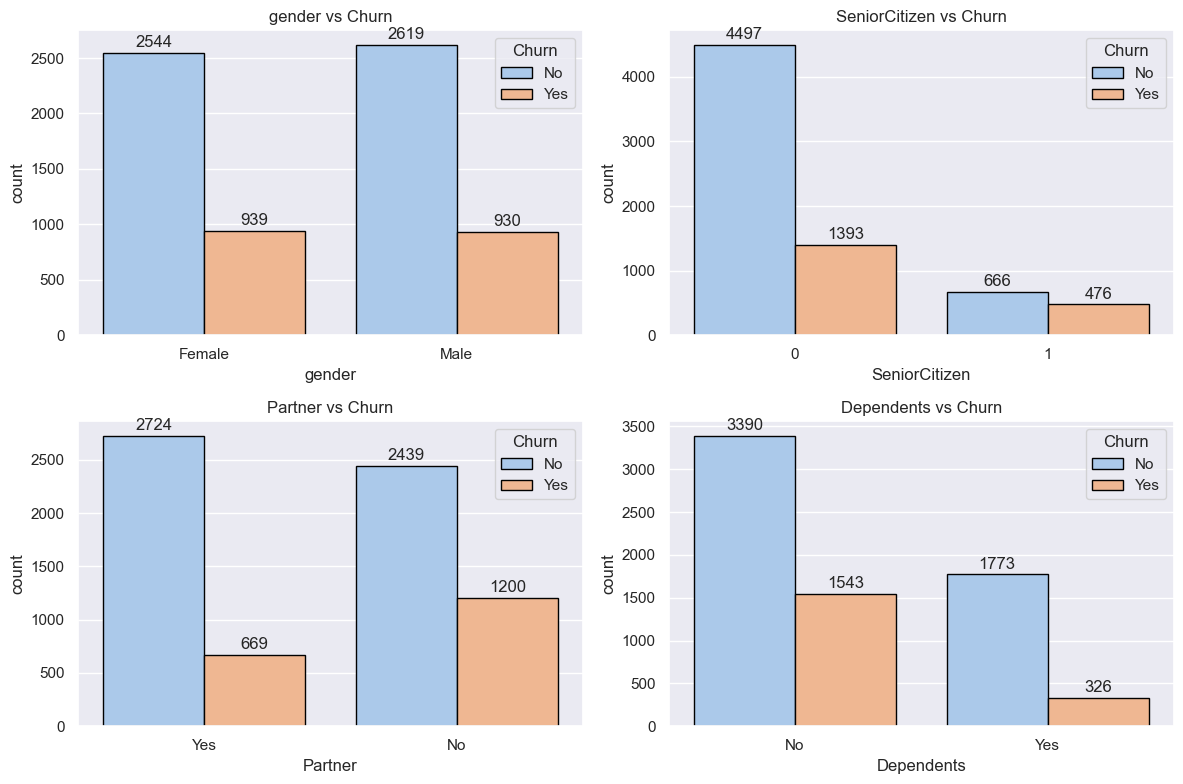

In [63]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()   #converts 2d to 1d

# Create count plots and optimize labels
for ax, col in zip(axes, l1):  #The zip() function takes corresponding elements from axes and l1 and combines them into pairs (tuples).
    sns.countplot(x=col, data=data, hue='Churn',palette = 'pastel' ,edgecolor='black', ax=ax)
    # Adding labels for both bars
    for container in ax.containers:  # containers is bar
        ax.bar_label(container, label_type='edge', padding=2)  # Optimized label addition
    ax.set_title(f'{col} vs Churn')

plt.tight_layout()
plt.show()


In [64]:
l2

['Contract', 'PaperlessBilling', 'PaymentMethod']

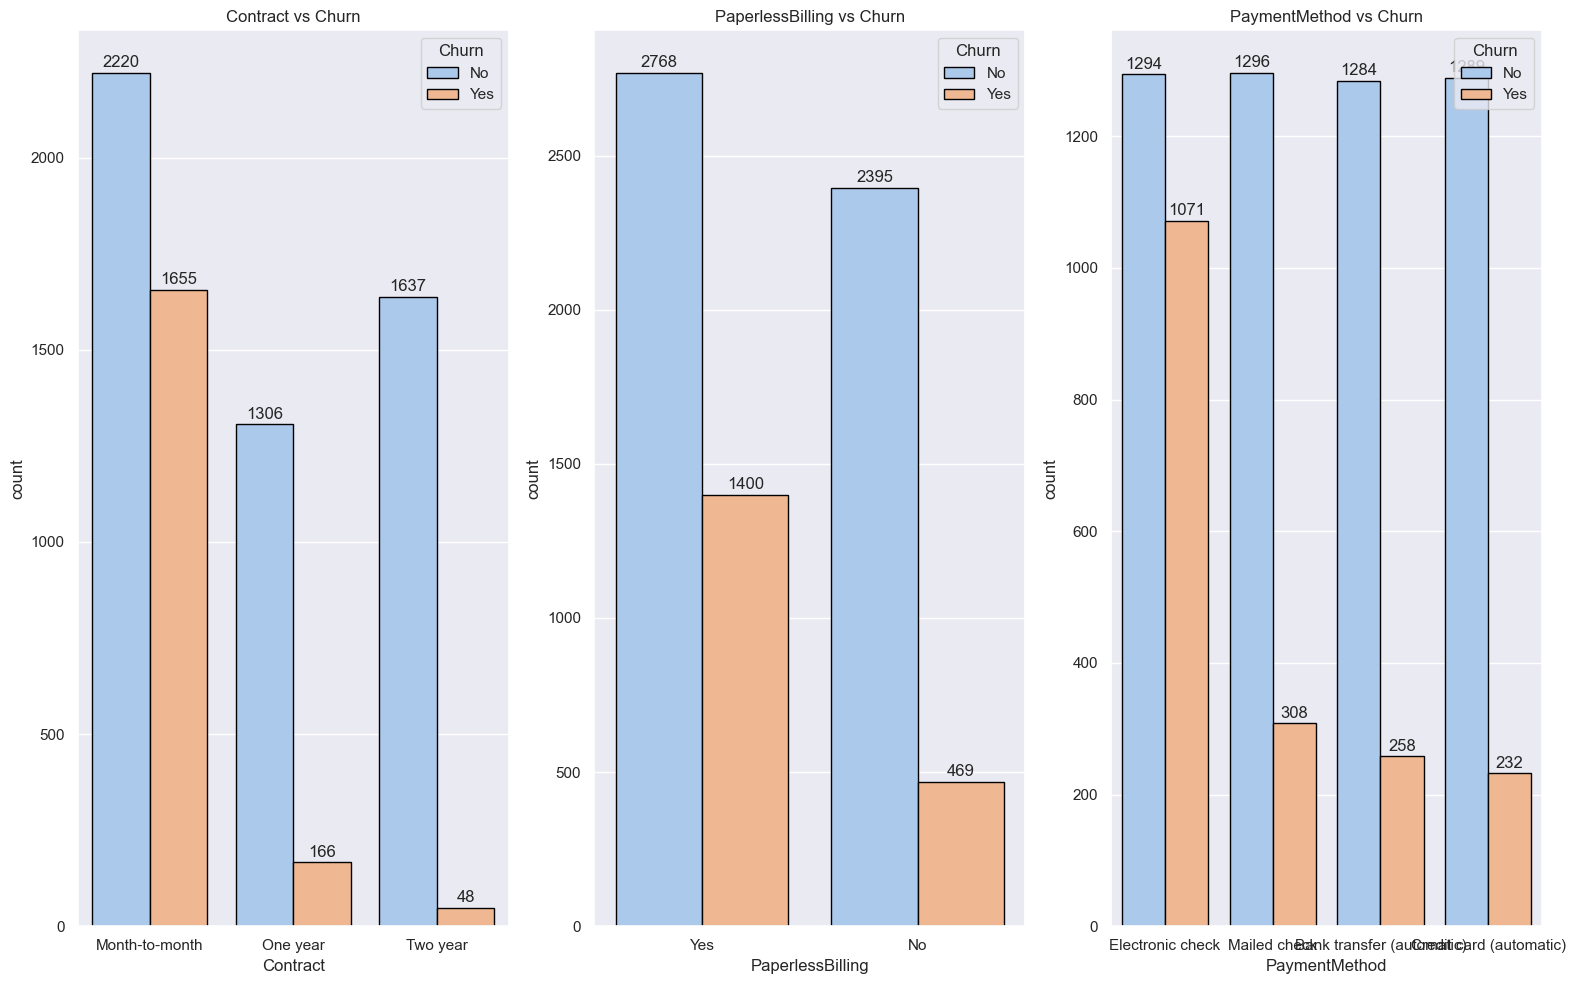

In [65]:
fig, axes = plt.subplots(1,3 ,figsize=(16,10))
axes = axes.flatten()   #converts 2d to 1d

# Create count plots and optimize labels
for ax, col in zip(axes, l2):  #The zip() function takes corresponding elements from axes and l2 and combines them into pairs (tuples).
    sns.countplot(x=col, data=data, hue='Churn',palette = 'pastel', edgecolor='black', ax=ax)
    # Adding labels for both bars
    for container in ax.containers:  # containers is bar
        ax.bar_label(container, label_type='edge', padding=2)  # Optimized label addition
    ax.set_title(f'{col} vs Churn')

plt.tight_layout()
plt.show()


In [66]:
l3

['PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

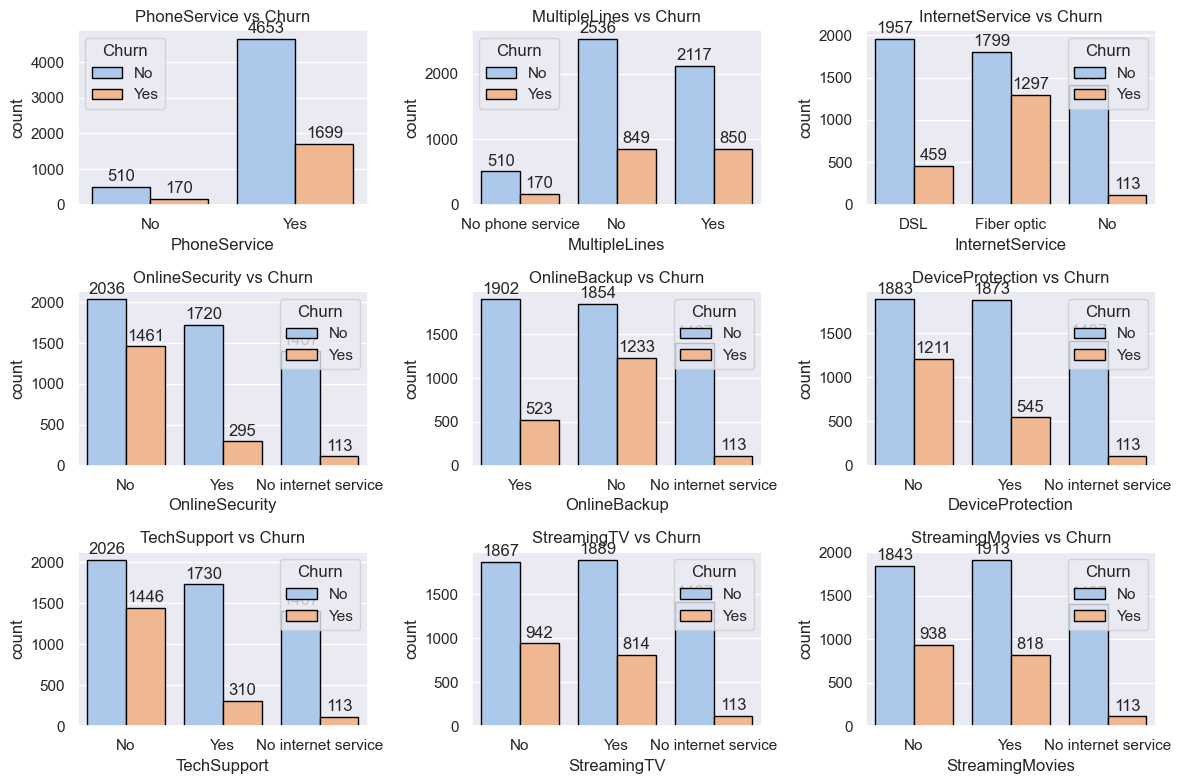

In [67]:
fig, axes = plt.subplots(3,3, figsize=(12, 8))
axes = axes.flatten()   #converts 2d to 1d

# Create count plots and optimize labels
for ax, col in zip(axes, l3):  #The zip() function takes corresponding elements from axes and l1 and combines them into pairs (tuples).
    sns.countplot(x=col, data=data, hue='Churn',palette = 'pastel' ,edgecolor='black', ax=ax)
    # Adding labels for both bars
    for container in ax.containers:  # containers is bar
        ax.bar_label(container, label_type='edge', padding=2)  # Optimized label addition
    ax.set_title(f'{col} vs Churn')

plt.tight_layout()
plt.show()


In [68]:
numerical_features

['tenure', 'MonthlyCharges', 'TotalCharges']

# Statistical Testsss

In [69]:
df1.describe()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
count 7032.00        7032.00  7032.00     7032.00 7032.00       7032.00   
mean     0.50           0.16     0.48        0.30   32.42          0.90   
std      0.50           0.37     0.50        0.46   24.55          0.30   
min      0.00           0.00     0.00        0.00    1.00          0.00   
25%      0.00           0.00     0.00        0.00    9.00          1.00   
50%      1.00           0.00     0.00        0.00   29.00          1.00   
75%      1.00           0.00     1.00        1.00   55.00          1.00   
max      1.00           1.00     1.00        1.00   72.00          1.00   

       MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
count        7032.00          7032.00         7032.00       7032.00   
mean            0.94             0.87            0.79          0.91   
std             0.95             0.74            0.86          0.88   
min             0.00             0.00            0.00          0.00   
25%             0.00             0.00            0.00          0.00   
50%             1.00             1.00            1.00          1.00   
75%             2.00             1.00            2.00          2.00   
max             2.00             2.00            2.00          2.00   

       DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
count           7032.00      7032.00      7032.00          7032.00   7032.00   
mean               0.90         0.80         0.98             0.99      0.69   
std                0.88         0.86         0.89             0.89      0.83   
min                0.00         0.00         0.00             0.00      0.00   
25%                0.00         0.00         0.00             0.00      0.00   
50%                1.00         1.00         1.00             1.00      0.00   
75%                2.00         2.00         2.00             2.00      1.00   
max                2.00         2.00         2.00             2.00      2.00   

       PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges   Churn  
count           7032.00        7032.00         7032.00       7032.00 7032.00  
mean               0.59           1.57           64.80       2283.30    0.27  
std                0.49           1.07           30.09       2266.77    0.44  
min                0.00           0.00           18.25         18.80    0.00  
25%                0.00           1.00           35.59        401.45    0.00  
50%                1.00           2.00           70.35       1397.47    0.00  
75%                1.00           2.00           89.86       3794.74    1.00  
max                1.00           3.00          118.75       8684.80    1.00

In [70]:
data.describe()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges
count        7032.00 7032.00         7032.00       7032.00
mean            0.16   32.42           64.80       2283.30
std             0.37   24.55           30.09       2266.77
min             0.00    1.00           18.25         18.80
25%             0.00    9.00           35.59        401.45
50%             0.00   29.00           70.35       1397.47
75%             0.00   55.00           89.86       3794.74
max             1.00   72.00          118.75       8684.80

using standardscaler will model performace will increase

In [71]:
#['tenure', 'MonthlyCharges', 'TotalCharges']
#Feature Scaling is Required

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df1['tenure'] = scaler.fit_transform(df1[['tenure']])
df1['MonthlyCharges'] = scaler.fit_transform(df1[['MonthlyCharges']])
df1['TotalCharges'] = scaler.fit_transform(df1[['TotalCharges']])
df1.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0   -1.28             0   
1       1              0        0           0    0.06             1   
2       1              0        0           0   -1.24             1   
3       1              0        0           0    0.51             0   
4       0              0        0           0   -1.24             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           -1.16         -0.99      0  
1                 0              3           -0.26         -0.17      0  
2                 1              3           -0.36         -0.96      1  
3                 0              0           -0.75         -0.20      0  
4                 1              2            0.20         -0.94      1

In [72]:
df1.describe()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
count 7032.00        7032.00  7032.00     7032.00 7032.00       7032.00   
mean     0.50           0.16     0.48        0.30   -0.00          0.90   
std      0.50           0.37     0.50        0.46    1.00          0.30   
min      0.00           0.00     0.00        0.00   -1.28          0.00   
25%      0.00           0.00     0.00        0.00   -0.95          1.00   
50%      1.00           0.00     0.00        0.00   -0.14          1.00   
75%      1.00           0.00     1.00        1.00    0.92          1.00   
max      1.00           1.00     1.00        1.00    1.61          1.00   

       MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
count        7032.00          7032.00         7032.00       7032.00   
mean            0.94             0.87            0.79          0.91   
std             0.95             0.74            0.86          0.88   
min             0.00             0.00            0.00          0.00   
25%             0.00             0.00            0.00          0.00   
50%             1.00             1.00            1.00          1.00   
75%             2.00             1.00            2.00          2.00   
max             2.00             2.00            2.00          2.00   

       DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
count           7032.00      7032.00      7032.00          7032.00   7032.00   
mean               0.90         0.80         0.98             0.99      0.69   
std                0.88         0.86         0.89             0.89      0.83   
min                0.00         0.00         0.00             0.00      0.00   
25%                0.00         0.00         0.00             0.00      0.00   
50%                1.00         1.00         1.00             1.00      0.00   
75%                2.00         2.00         2.00             2.00      1.00   
max                2.00         2.00         2.00             2.00      2.00   

       PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges   Churn  
count           7032.00        7032.00         7032.00       7032.00 7032.00  
mean               0.59           1.57            0.00         -0.00    0.27  
std                0.49           1.07            1.00          1.00    0.44  
min                0.00           0.00           -1.55         -1.00    0.00  
25%                0.00           1.00           -0.97         -0.83    0.00  
50%                1.00           2.00            0.18         -0.39    0.00  
75%                1.00           2.00            0.83          0.67    1.00  
max                1.00           3.00            1.79          2.82    1.00

### Correlation is a vital statistical tool to analyze relationships between variables, providing insights into data patterns and trends.

<Axes: >

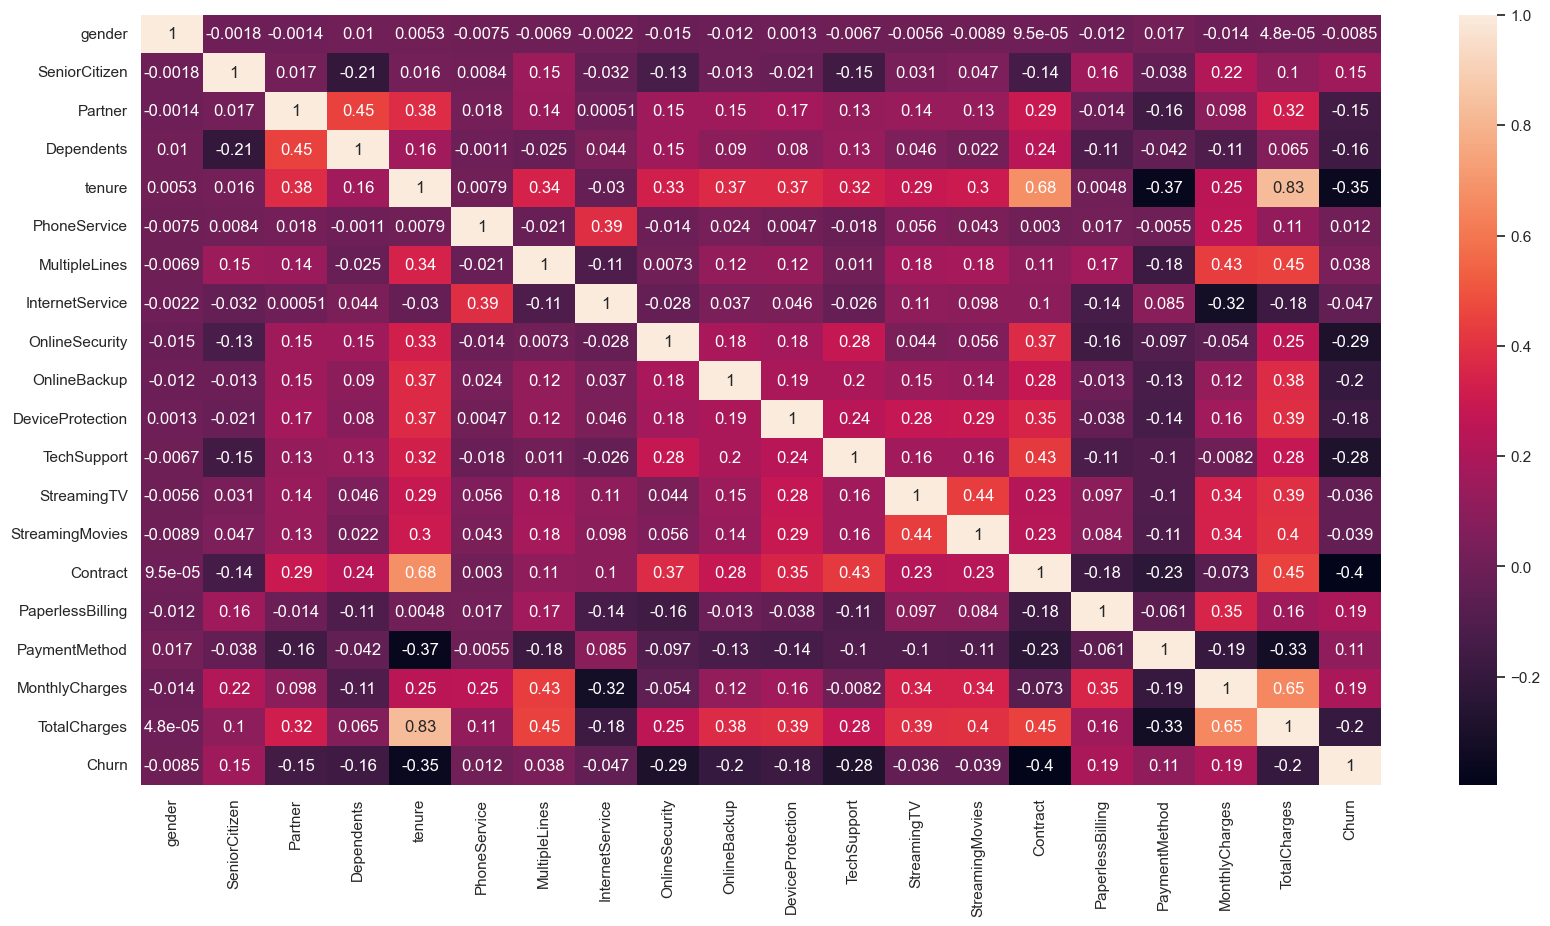

In [73]:
plt.figure(figsize  =(20,10))
sns.heatmap(df1.corr(),annot= True) #annot -display the values

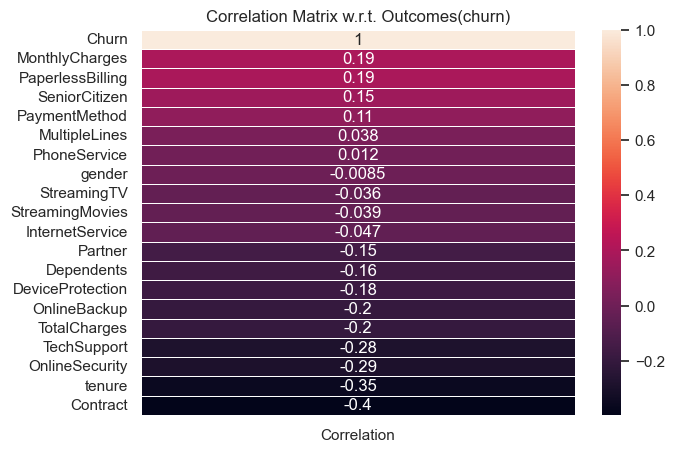

In [74]:
corr = df1.corrwith(df1['Churn']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlation']
plt.subplots(figsize = (7,5))
sns.heatmap(corr,annot = True,linewidths = 0.4)
plt.title('Correlation Matrix w.r.t. Outcomes(churn)')
plt.show()

# Tests

In [75]:
df1.describe()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
count 7032.00        7032.00  7032.00     7032.00 7032.00       7032.00   
mean     0.50           0.16     0.48        0.30   -0.00          0.90   
std      0.50           0.37     0.50        0.46    1.00          0.30   
min      0.00           0.00     0.00        0.00   -1.28          0.00   
25%      0.00           0.00     0.00        0.00   -0.95          1.00   
50%      1.00           0.00     0.00        0.00   -0.14          1.00   
75%      1.00           0.00     1.00        1.00    0.92          1.00   
max      1.00           1.00     1.00        1.00    1.61          1.00   

       MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
count        7032.00          7032.00         7032.00       7032.00   
mean            0.94             0.87            0.79          0.91   
std             0.95             0.74            0.86          0.88   
min             0.00             0.00            0.00          0.00   
25%             0.00             0.00            0.00          0.00   
50%             1.00             1.00            1.00          1.00   
75%             2.00             1.00            2.00          2.00   
max             2.00             2.00            2.00          2.00   

       DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
count           7032.00      7032.00      7032.00          7032.00   7032.00   
mean               0.90         0.80         0.98             0.99      0.69   
std                0.88         0.86         0.89             0.89      0.83   
min                0.00         0.00         0.00             0.00      0.00   
25%                0.00         0.00         0.00             0.00      0.00   
50%                1.00         1.00         1.00             1.00      0.00   
75%                2.00         2.00         2.00             2.00      1.00   
max                2.00         2.00         2.00             2.00      2.00   

       PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges   Churn  
count           7032.00        7032.00         7032.00       7032.00 7032.00  
mean               0.59           1.57            0.00         -0.00    0.27  
std                0.49           1.07            1.00          1.00    0.44  
min                0.00           0.00           -1.55         -1.00    0.00  
25%                0.00           1.00           -0.97         -0.83    0.00  
50%                1.00           2.00            0.18         -0.39    0.00  
75%                1.00           2.00            0.83          0.67    1.00  
max                1.00           3.00            1.79          2.82    1.00

In [76]:
# Chi-Square = compares categories (e.g., yes/no, groups).without measuring how strongly
# ANOVA = compares averages across multiple groups (3+) to infer possible relationships.

# Chi Square Test (categorical_features)

In [77]:
df1.head(1)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0   -1.28             0   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           -1.16         -0.99      0

#### select the most important categorical features based on their Chi-Squared scores, and visualizes their importance relative to predicting Churn.

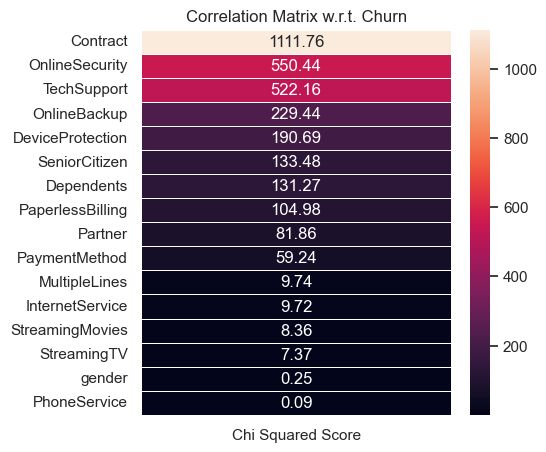

In [78]:
features = df1.loc[:,categorical_features] #char
Target = df1.loc[:,'Churn']            # .loc[] :  rows and columns by labels , : is all rows
best_features = SelectKBest(score_func = chi2, k ='all')
fit = best_features.fit(features,Target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(categorical_features),
                            columns = ['Chi Squared Score'])
plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),
           annot = True,linewidths = 0.4,fmt = '.2f')
plt.title('Correlation Matrix w.r.t. Churn')
plt.show()

## summmary
### Contract has the highest score because it strongly influences customer churn. Short-term contracts offer flexibility, leading to higher churn,while long-term contracts create retention, making it a key predictor of customer behavior.

# Anova Testing (Numerical features) or F-score

In [79]:
from sklearn.feature_selection import f_classif

In [80]:
numerical_features

['tenure', 'MonthlyCharges', 'TotalCharges']

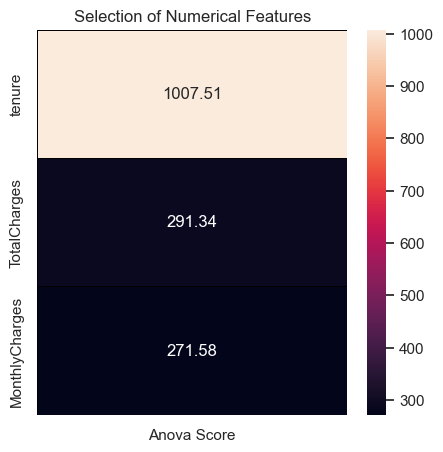

In [81]:
features = df1.loc[:,numerical_features]
target = df1.loc[:,'Churn']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),
                            columns = ['Anova Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Anova Score'),
           annot = True ,linewidths = 0.4,linecolor = 'black', fmt='.2f')
plt.title('Selection of Numerical Features')
plt.show()

#### "Tenure" has the highest ANOVA score, indicating its strong influence on predicting customer churn.

In [82]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### Feature importance graph using Random Forest

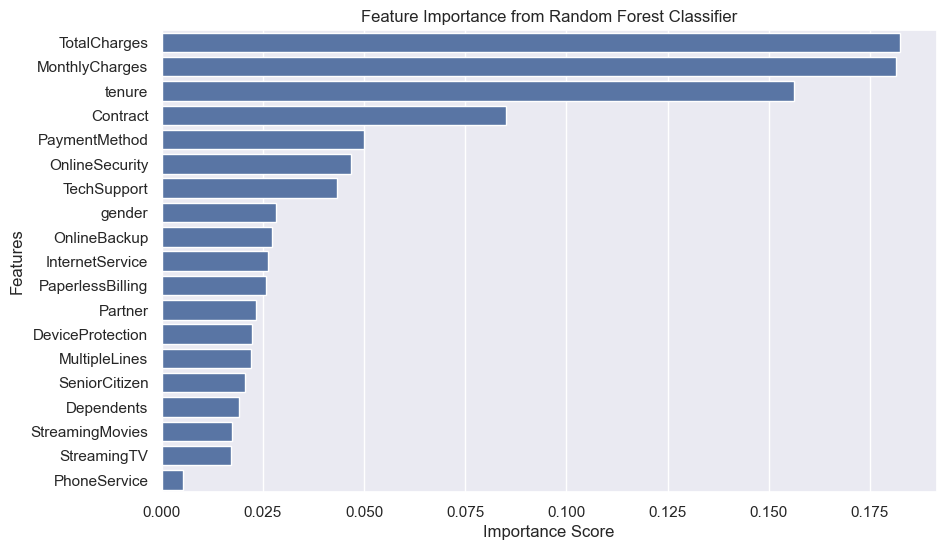

In [83]:

X = df1.drop(columns=['Churn'])  # Features
y = df1['Churn']                   # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_importances = pd.DataFrame(importances, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances['Importance'], y=feature_importances.index)
plt.title('Feature Importance from Random Forest Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


### logistic Regression

In [84]:
x = df1[numerical_features]
y = df1['Churn']
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=101)
LR = LogisticRegression()
LR.fit(x_train, y_train)

y_pred_test = LR.predict(x_test)
print('Logistic regression')
Accuracy_LR = accuracy_score(y_test, y_pred_test)
print("Accuracy_LR:",Accuracy_LR )
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

Logistic regression
Accuracy_LR: 0.7882018479033405

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.87      1052
           1       0.62      0.43      0.50       355

    accuracy                           0.79      1407
   macro avg       0.72      0.67      0.68      1407
weighted avg       0.77      0.79      0.77      1407



In [85]:
df1

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0   -1.28             0   
1          1              0        0           0    0.06             1   
2          1              0        0           0   -1.24             1   
3          1              0        0           0    0.51             0   
4          0              0        0           0   -1.24             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1   -0.34             1   
7039       0              0        1           1    1.61             1   
7040       0              0        1           1   -0.87             0   
7041       1              1        1           0   -1.16             1   
7042       1              0        0           0    1.37             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0               0             2   
1                 0                0               2             0   
2                 0                0               2             2   
3                 1                0               2             0   
4                 0                1               0             0   
...             ...              ...             ...           ...   
7038              2                0               2             0   
7039              2                1               0             2   
7040              1                0               2             0   
7041              2                1               0             0   
7042              0                1               2             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            0            0                0         0   
1                    2            0            0                0         1   
2                    0            0            0                0         0   
3                    2            2            0                0         1   
4                    0            0            0                0         0   
...                ...          ...          ...              ...       ...   
7038                 2            2            2                2         1   
7039                 2            0            2                2         1   
7040                 0            0            0                0         0   
7041                 0            0            0                0         0   
7042                 2            2            2                2         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                    1              2           -1.16         -0.99      0  
1                    0              3           -0.26         -0.17      0  
2                    1              3           -0.36         -0.96      1  
3                    0              0           -0.75         -0.20      0  
4                    1              2            0.20         -0.94      1  
...                ...            ...             ...           ...    ...  
7038                 1              3            0.66         -0.13      0  
7039                 1              1            1.28          2.24      0  
7040                 1              2           -1.17         -0.85      0  
7041                 1              3            0.32         -0.87      1  
7042                 1              0            1.36          2.01      0  

[7032 rows x 20 columns]

In [86]:
y_test.shape

(1407,)

# pipeline - Random Forest and XGBoost

In [87]:

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[('num',StandardScaler(), numerical_features)])

# Create a pipeline with preprocessing and model
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])  # Change to any classifier you want

# Fit the model
model_pipeline.fit(x_train, y_train)

# Make predictions
y_pred = model_pipeline.predict(x_test)

# Evaluate the model
print('random f.')
Accuracy_random_forest = accuracy_score(y_test, y_pred)
print("Accuracy_rf:", Accuracy_random_forest)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
('\n*****')

# Replace RandomForestClassifier with XGBClassifier
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', XGBClassifier(n_estimators=100, random_state=42))])

# Fit and predict again
model_pipeline.fit(x_train, y_train)
y_pred = model_pipeline.predict(x_test)

# Evaluate the model
print('XGB')
Accuracy_XGBoost = accuracy_score(y_test, y_pred)
print("Accuracy_xgb:",Accuracy_XGBoost )
print("\nClassification Report:\n", classification_report(y_test, y_pred))


random f.
Accuracy_rf: 0.7654584221748401

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1052
           1       0.54      0.47      0.50       355

    accuracy                           0.77      1407
   macro avg       0.68      0.67      0.67      1407
weighted avg       0.76      0.77      0.76      1407

XGB
Accuracy_xgb: 0.7718550106609808

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85      1052
           1       0.56      0.45      0.50       355

    accuracy                           0.77      1407
   macro avg       0.69      0.67      0.68      1407
weighted avg       0.76      0.77      0.76      1407



### SVM

In [88]:

# Initialize SVM with an RBF kernel
svm_model = SVC(kernel='rbf', random_state=42)

# Train the model
svm_model.fit(x_train, y_train)

# Predictions on the test set
y_pred_svm = svm_model.predict(x_test)

# Evaluation of the model
Accuracy_SVM =  accuracy_score(y_test, y_pred_svm)
print("SVM_Classifier_Accuracy:",Accuracy_SVM)
print("\nClassification Report for SVM:")
print(classification_report(y_test, y_pred_svm))


SVM_Classifier_Accuracy: 0.798862828713575

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.82      0.94      0.88      1052
           1       0.69      0.37      0.48       355

    accuracy                           0.80      1407
   macro avg       0.75      0.66      0.68      1407
weighted avg       0.78      0.80      0.78      1407



### KNN

In [89]:

# Initialize KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(x_train, y_train)

# Predictions on the test set
y_pred_knn = knn_model.predict(x_test)

# Evaluation of the model
Accuracy_KNN = accuracy_score(y_test,y_pred_knn)
print("KNN_Classifier_Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report for KNN:")
print(classification_report(y_test, y_pred_knn))


KNN_Classifier_Accuracy: 0.7732764747690121

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1052
           1       0.55      0.52      0.54       355

    accuracy                           0.77      1407
   macro avg       0.70      0.69      0.69      1407
weighted avg       0.77      0.77      0.77      1407



# MODELS COMPARISON

In [90]:
model_comparison = pd.DataFrame ({
     'Accuracy Score': [Accuracy_random_forest,Accuracy_XGBoost,Accuracy_SVM,Accuracy_KNN,Accuracy_LR],
     'Model_Name': ['RANDOM_F','XGB','SVM','KNN ','LR']})
model_comparison_df = model_comparison.sort_values(by='Accuracy Score',ascending=False)
model_comparison_df = model_comparison_df.set_index('Accuracy Score')
model_comparison_df.reset_index()

Accuracy Score Model_Name
0            0.80        SVM
1            0.79         LR
2            0.77       KNN 
3            0.77        XGB
4            0.77   RANDOM_F

### Steps to improve the performance of model:
#### 1. Hyper parameter Tunning

Minimizing churn involves a combination of predictive analytics, 
customer engagement, and continuous improvement. 
By leveraging your churn prediction model effectively and 
implementing targeted retention strategies, 
you can enhance customer loyalty and reduce churn rates.

In [94]:
df1.to_excel('TELECOM_clean.xlsx')